### Training data preparation

- Input: 
    1. Raw training images
    2. Instance segmentation maps from ilastik
   
- Applies: 
    1. Remove small objects
    2. Fill small holes
    3. Remove large objects ---- Nope 
    4. Edge smoothing
    5. Thresholding
    
- Output:
    1. .npz file (X = raw, instance = segmap, class = class labels) 
    

In [1]:
import numpy as np
from skimage import morphology, filters, measure
import matplotlib.pyplot as plt
import h5py
import glob
import path
import cv2
import scipy


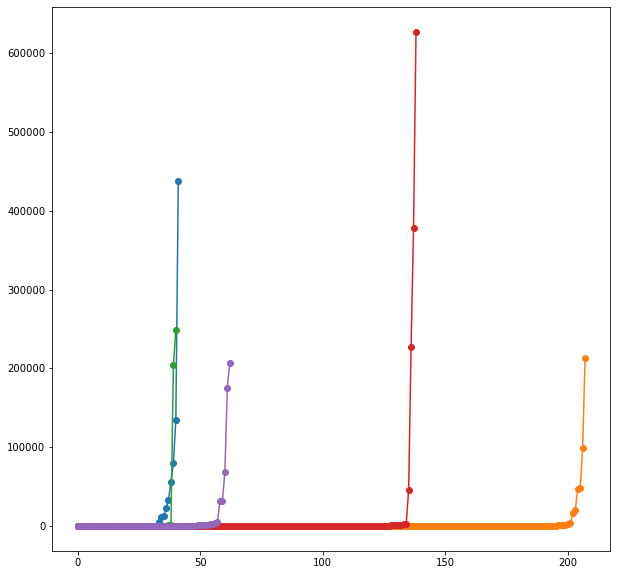

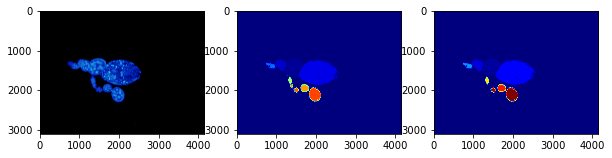

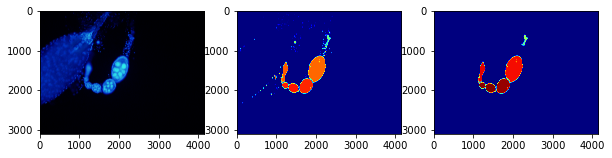

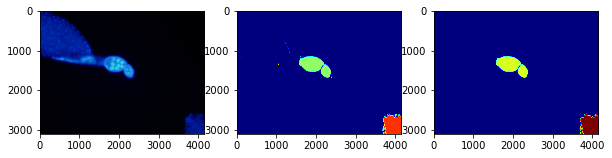

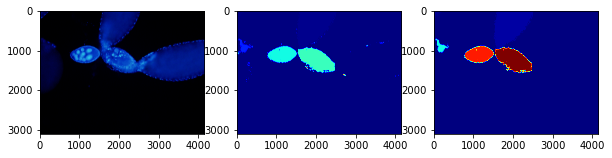

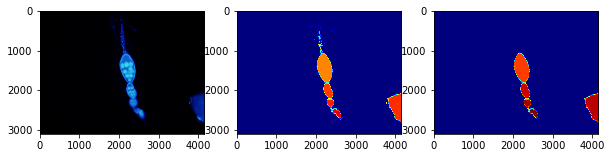

In [15]:
segmap_dir = "/home/bandyadkas/Desktop/images/2d_images/segmented/"
outdir = "/home/bandyadkas/Desktop/"
segmap_paths = glob.glob(segmap_dir+"*Ident*")
fig1, ax1 = plt.subplots(figsize=(10,10))
x_arrays = []
y_arrays = []

for segmap in segmap_paths:
    img_id = segmap.split("/")[-1].split('_')[0]+"_"+segmap.split("/")[-1].split('_')[1]
    orig_img = glob.glob(segmap_dir+img_id+"*.tif")[0]
    orig_img = plt.imread(orig_img)

    segmap = read_segmaps(segmap)
    areas = find_small_object_removal_threshold(segmap)
    ax1.plot(areas,marker='o')
    fig1.savefig(outdir+"removeSmallObjects_areaThreshold.png")
    #ax1.set_ylim(0,2000) 
    #fig1.savefig(outdir+"removeSmallObjects_areaThreshold_ylim2000.png")

    removeSmallObj = morphology.remove_small_objects(segmap.astype("int"), 10000)
    #fillholes = morphology.flood_fill(removeSmallObj_img,seed_point=)
    #fillholes = scipy.ndimage.binary_fill_holes(removeSmallObj).astype(int)

    x_arrays.append(orig_img)
    y_arrays.append(removeSmallObj)


    fig, ax = plt.subplots(1,3,figsize=(10,10))
    ax[0].imshow(orig_img)
    ax[1].imshow(segmap, cmap ="jet")
    ax[2].imshow(removeSmallObj, cmap ="jet")
    #ax[3].imshow(fillholes, cmap ="jet")

x_stack = np.stack(x_arrays,axis=0)
y_stack = np.stack(y_arrays, axis=0)

np.savez('/home/bandyadkas/Desktop/classifyOvarioles.npz', X=x_stack, Y=y_stack)

In [2]:
##instance segmentation

#filename = "/home/bandyadkas/Desktop/images/2d_images/Egg_chamber_images_segmented/010920_A27042_WT_DAPI_Object_Identities.h5"
def read_segmaps(filename):
    with h5py.File(filename, "r") as f:
        #print("Keys: %s" % f.keys())
        a_group_key = list(f.keys())[0]
        segmap = np.array(f[a_group_key])

        #plt.figure(figsize=(10, 10))
        #plt.imshow(segmap)
    return segmap


In [3]:
def find_small_object_removal_threshold(segmap): 
    labels = measure.label(segmap)
    props = measure.regionprops(labels, segmap)
    properties = ['area']   
    all_object_areas = []
    for index in range(1, labels.max()):
        for prop_name in properties:
            object_area = getattr(props[index], prop_name)
            all_object_areas.append(object_area)
    all_object_areas = sorted(all_object_areas)
    #print(all_object_areas)
    #return min(all_object_areas[-5:])
    return all_object_areas
        

In [16]:
test = np.load("/home/bandyadkas/Desktop/classifyOvarioles.npz")

In [27]:
print(np.shape(test))
print(np.shape(test['X']))
print(np.shape(test['Y']))


(2,)
(5, 3096, 4140, 3)
(5, 3096, 4140, 1)
